In [2]:
#The following libraries are used for building and running the LSTM model
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/10
824/824 [==============================] - 10s 8ms/step - loss: 7.1097e-04
Epoch 2/10
824/824 [==============================] - 7s 9ms/step - loss: 2.1700e-04
Epoch 3/10
824/824 [==============================] - 7s 8ms/step - loss: 1.5824e-04
Epoch 4/10
824/824 [==============================] - 7s 9ms/step - loss: 1.3510e-04
Epoch 5/10
824/824 [==============================] - 7s 9ms/step - loss: 1.2289e-04
Epoch 6/10
824/824 [==============================] - 7s 9ms/step - loss: 1.1226e-04
Epoch 7/10
824/824 [==============================] - 7s 9ms/step - loss: 9.4040e-05
Epoch 8/10
824/824 [==============================] - 7s 8ms/step - loss: 9.2198e-05
Epoch 9/10
824/824 [==============================] - 7s 9ms/step - loss: 8.0529e-05
Epoch 10/10
65/65 [==============================] - 1s 4ms/step


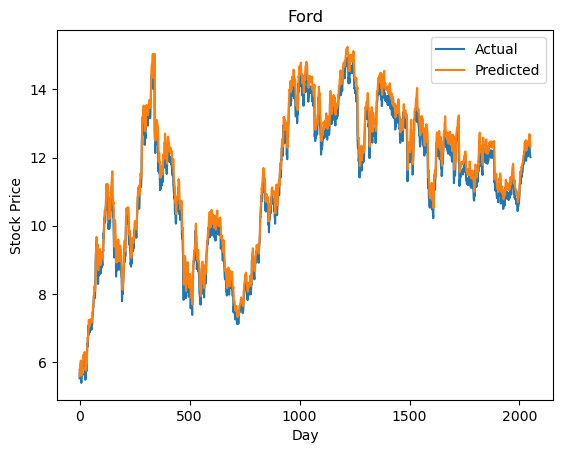

In [6]:
#For f.us.txt (Ford)
# Load the Apple stock price dataset
data_f = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/f.us.txt')

# Preprocess the dataset
data_f['Date'] = pd.to_datetime(data_f['Date'])
data_f.set_index('Date', inplace=True)
data_f.sort_index(ascending=True, inplace=True)
data_f = data_f['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler_f = MinMaxScaler(feature_range=(0, 1))
scaled_data_f = scaler_f.fit_transform(data_f)

# Split the dataset into training and testing sets
train_size_f = int(len(scaled_data_f) * 0.8)
train_data_f, test_data_f = scaled_data_f[:train_size_f], scaled_data_f[train_size_f:]

# Create sequences for training
def create_sequences(data_f, seq_length_f):
    X, y = [], []
    for i in range(len(data_f) - seq_length_f):
        X.append(data_f[i : i + seq_length_f])
        y.append(data_f[i + seq_length_f])
    return np.array(X), np.array(y)

sequence_length_f = 10
X_train_f, y_train_f = create_sequences(train_data_f, sequence_length_f)
X_test_f, y_test_f = create_sequences(test_data_f, sequence_length_f)

# Build the LSTM model
model_f = Sequential()
model_f.add(LSTM(64, input_shape=(sequence_length_f, 1)))
model_f.add(Dense(1))
model_f.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_f.fit(X_train_f, y_train_f, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_f = model_f.predict(X_test_f)

# Inverse scaling for the predicted and actual values
predictions_f = scaler_f.inverse_transform(predictions_f)
y_test_f = scaler_f.inverse_transform(y_test_f)

# Plot the actual and predicted values
plt.plot(y_test_f, label='Actual')
plt.plot(predictions_f, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Ford')
plt.legend()
plt.show()


In [5]:
model_f.summary()
#print(model_f.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Calculate the metrics
diff_f = np.abs(predictions_f - y_test_f)
max_diff_f = np.max(diff_f)
min_diff_f = np.min(diff_f)
mse_f = mean_squared_error(y_test_f, predictions_f)
rmse_f = np.sqrt(mse_f)
mae_f = mean_absolute_error(y_test_f, predictions_f)

# Print the metrics
print("For Ford")
print("Maximum Difference (Max Diff):", max_diff_f)
print("Minimum Difference (Min Diff):", min_diff_f)
print("Mean Squared Error (MSE):", mse_f)
print("Root Mean Squared Error (RMSE):", rmse_f)
print("Average Mean Error (AME):", mae_f)

For Ford
Maximum Difference (Max Diff): 1.8727665939331057
Minimum Difference (Min Diff): 6.462097166703984e-06
Mean Squared Error (MSE): 0.041422137466848065
Root Mean Squared Error (RMSE): 0.20352429208044936
Average Mean Error (AME): 0.14843440660339982


Epoch 1/10
140/140 [==============================] - 3s 6ms/step - loss: 0.0110
Epoch 2/10
140/140 [==============================] - 1s 6ms/step - loss: 9.3436e-04
Epoch 3/10
140/140 [==============================] - 1s 6ms/step - loss: 8.8341e-04
Epoch 4/10
140/140 [==============================] - 1s 6ms/step - loss: 8.1969e-04
Epoch 5/10
140/140 [==============================] - 1s 7ms/step - loss: 7.9555e-04
Epoch 6/10
140/140 [==============================] - 1s 6ms/step - loss: 7.2857e-04
Epoch 7/10
140/140 [==============================] - 1s 6ms/step - loss: 6.5905e-04
Epoch 8/10
140/140 [==============================] - 1s 6ms/step - loss: 6.3375e-04
Epoch 9/10
140/140 [==============================] - 1s 6ms/step - loss: 6.3249e-04
Epoch 10/10
11/11 [==============================] - 0s 3ms/step


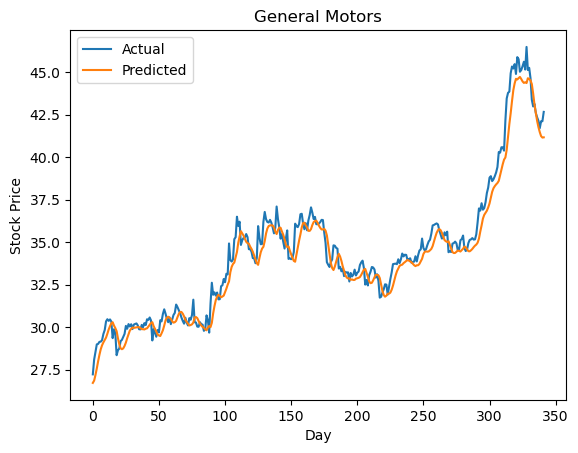

In [11]:
#For gm.us.txt (General Motors)
# Load the Apple stock price dataset
data_gm = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/gm.us.txt')

# Preprocess the dataset
data_gm['Date'] = pd.to_datetime(data_gm['Date'])
data_gm.set_index('Date', inplace=True)
data_gm.sort_index(ascending=True, inplace=True)
data_gm = data_gm['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_gm = MinMaxScaler(feature_range=(0, 1))
scaled_data_gm = scaler_gm.fit_transform(data_gm)

# Split the dataset into training and testing sets
train_size_gm = int(len(scaled_data_gm) * 0.8)
train_data_gm, test_data_gm = scaled_data_gm[:train_size_gm], scaled_data_gm[train_size_gm:]

# Create sequences for training
def create_sequences(data_gm, seq_length_gm):
    X, y = [], []
    for i in range(len(data_gm) - seq_length_gm):
        X.append(data_gm[i : i + seq_length_gm])
        y.append(data_gm[i + seq_length_gm])
    return np.array(X), np.array(y)

sequence_length_gm = 10
X_train_gm, y_train_gm = create_sequences(train_data_gm, sequence_length_gm)
X_test_gm, y_test_gm = create_sequences(test_data_gm, sequence_length_gm)

# Build the LSTM model
model_gm = Sequential()
model_gm.add(LSTM(64, input_shape=(sequence_length_gm, 1)))
model_gm.add(Dense(1))
model_gm.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_gm.fit(X_train_gm, y_train_gm, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_gm = model_gm.predict(X_test_gm)

# Inverse scaling for the predicted and actual values
predictions_gm = scaler_gm.inverse_transform(predictions_gm)
y_test_gm = scaler_gm.inverse_transform(y_test_gm)

# Plot the actual and predicted values
plt.plot(y_test_gm, label='Actual')
plt.plot(predictions_gm, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('General Motors')
plt.legend()
plt.show()


In [12]:
# Calculate the metrics
diff_gm = np.abs(predictions_gm - y_test_gm)
max_diff_gm = np.max(diff_gm)
min_diff_gm = np.min(diff_gm)
mse_gm = mean_squared_error(y_test_gm, predictions_gm)
rmse_gm = np.sqrt(mse_gm)
mae_gm = mean_absolute_error(y_test_gm, predictions_gm)

# Print the metrics
print("For General Motors")
print("Maximum Difference (Max Diff):", max_diff_gm)
print("Minimum Difference (Min Diff):", min_diff_gm)
print("Mean Squared Error (MSE):", mse_gm)
print("Root Mean Squared Error (RMSE):", rmse_gm)
print("Average Mean Error (AME):", mae_gm)

For General Motors
Maximum Difference (Max Diff): 3.0177223205566435
Minimum Difference (Min Diff): 0.0023356933593738916
Mean Squared Error (MSE): 0.6318574759544872
Root Mean Squared Error (RMSE): 0.7948946319824327
Average Mean Error (AME): 0.6134286996049491


Epoch 1/10
255/255 [==============================] - 3s 5ms/step - loss: 0.0097
Epoch 2/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 3/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 4/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 5/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 6/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 7/10
255/255 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 8/10
255/255 [==============================] - 1s 4ms/step - loss: 9.3233e-04
Epoch 9/10
255/255 [==============================] - 1s 4ms/step - loss: 8.3382e-04
Epoch 10/10
20/20 [==============================] - 0s 2ms/step


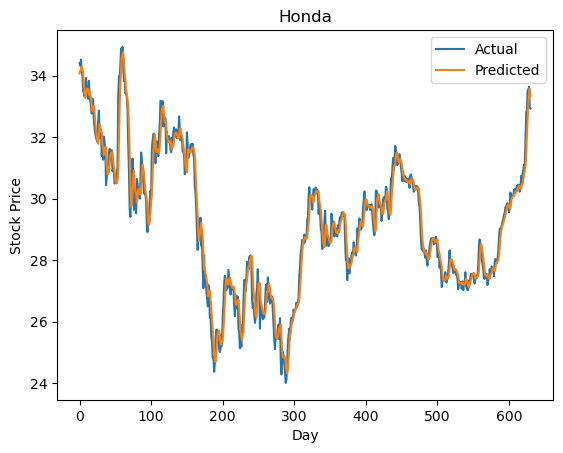

In [13]:
#For hmc.us.txt (honda)
# Load the Apple stock price dataset
data_hmc = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hmc.us.txt')

# Preprocess the dataset
data_hmc['Date'] = pd.to_datetime(data_hmc['Date'])
data_hmc.set_index('Date', inplace=True)
data_hmc.sort_index(ascending=True, inplace=True)
data_hmc = data_hmc['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_hmc = MinMaxScaler(feature_range=(0, 1))
scaled_data_hmc = scaler_hmc.fit_transform(data_hmc)

# Split the dataset into training and testing sets
train_size_hmc = int(len(scaled_data_hmc) * 0.8)
train_data_hmc, test_data_hmc = scaled_data_hmc[:train_size_hmc], scaled_data_hmc[train_size_hmc:]

# Create sequences for training
def create_sequences(data_hmc, seq_length_hmc):
    X, y = [], []
    for i in range(len(data_hmc) - seq_length_hmc):
        X.append(data_hmc[i : i + seq_length_hmc])
        y.append(data_hmc[i + seq_length_hmc])
    return np.array(X), np.array(y)

sequence_length_hmc = 10
X_train_hmc, y_train_hmc = create_sequences(train_data_hmc, sequence_length_hmc)
X_test_hmc, y_test_hmc = create_sequences(test_data_hmc, sequence_length_hmc)

# Build the LSTM model
model_hmc = Sequential()
model_hmc.add(LSTM(64, input_shape=(sequence_length_hmc, 1)))
model_hmc.add(Dense(1))
model_hmc.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_hmc.fit(X_train_hmc, y_train_hmc, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_hmc = model_hmc.predict(X_test_hmc)

# Inverse scaling for the predicted and actual values
predictions_hmc = scaler_hmc.inverse_transform(predictions_hmc)
y_test_hmc = scaler_hmc.inverse_transform(y_test_hmc)

# Plot the actual and predicted values
plt.plot(y_test_hmc, label='Actual')
plt.plot(predictions_hmc, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Honda')
plt.legend()
plt.show()


In [14]:
# Calculate the metrics
diff_hmc = np.abs(predictions_hmc - y_test_hmc)
max_diff_hmc = np.max(diff_hmc)
min_diff_hmc = np.min(diff_hmc)
mse_hmc = mean_squared_error(y_test_hmc, predictions_hmc)
rmse_hmc = np.sqrt(mse_hmc)
mae_hmc = mean_absolute_error(y_test_hmc, predictions_hmc)

# Print the metrics
print("For Honda")
print("Maximum Difference (Max Diff):", max_diff_hmc)
print("Minimum Difference (Min Diff):", min_diff_hmc)
print("Mean Squared Error (MSE):", mse_hmc)
print("Root Mean Squared Error (RMSE):", rmse_hmc)
print("Average Mean Error (AME):", mae_hmc)

For Honda
Maximum Difference (Max Diff): 2.5134399719238303
Minimum Difference (Min Diff): 0.0002780609130859091
Mean Squared Error (MSE): 0.22498189623622336
Root Mean Squared Error (RMSE): 0.4743225655987952
Average Mean Error (AME): 0.3407419054663125


Epoch 1/10
965/965 [==============================] - 7s 5ms/step - loss: 5.8608e-04
Epoch 2/10
965/965 [==============================] - 5s 5ms/step - loss: 1.5346e-04
Epoch 3/10
965/965 [==============================] - 4s 5ms/step - loss: 1.2677e-04
Epoch 4/10
965/965 [==============================] - 4s 5ms/step - loss: 1.0194e-04
Epoch 5/10
965/965 [==============================] - 5s 5ms/step - loss: 8.8982e-05
Epoch 6/10
965/965 [==============================] - 5s 5ms/step - loss: 7.8281e-05
Epoch 7/10
965/965 [==============================] - 5s 5ms/step - loss: 6.9260e-05
Epoch 8/10
965/965 [==============================] - 4s 5ms/step - loss: 6.0926e-05
Epoch 9/10
965/965 [==============================] - 5s 5ms/step - loss: 5.8961e-05
Epoch 10/10
76/76 [==============================] - 1s 3ms/step


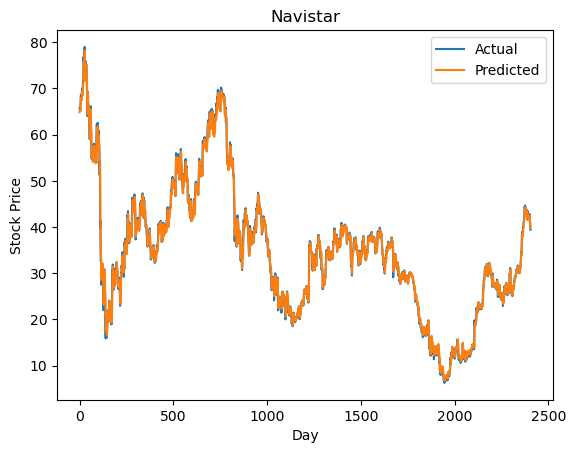

In [15]:
#For navus.txt (Navistar)
# Load the Apple stock price dataset
data_nav = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/nav.us.txt')

# Preprocess the dataset
data_nav['Date'] = pd.to_datetime(data_nav['Date'])
data_nav.set_index('Date', inplace=True)
data_nav.sort_index(ascending=True, inplace=True)
data_nav = data_nav['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_nav = MinMaxScaler(feature_range=(0, 1))
scaled_data_nav = scaler_nav.fit_transform(data_nav)

# Split the dataset into training and testing sets
train_size_nav = int(len(scaled_data_nav) * 0.8)
train_data_nav, test_data_nav = scaled_data_nav[:train_size_nav], scaled_data_nav[train_size_nav:]

# Create sequences for training
def create_sequences(data_nav, seq_length_nav):
    X, y = [], []
    for i in range(len(data_nav) - seq_length_nav):
        X.append(data_nav[i : i + seq_length_nav])
        y.append(data_nav[i + seq_length_nav])
    return np.array(X), np.array(y)

sequence_length_nav = 10
X_train_nav, y_train_nav = create_sequences(train_data_nav, sequence_length_nav)
X_test_nav, y_test_nav = create_sequences(test_data_nav, sequence_length_nav)

# Build the LSTM model
model_nav = Sequential()
model_nav.add(LSTM(64, input_shape=(sequence_length_nav, 1)))
model_nav.add(Dense(1))
model_nav.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_nav.fit(X_train_nav, y_train_nav, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_nav = model_nav.predict(X_test_nav)

# Inverse scaling for the predicted and actual values
predictions_nav = scaler_nav.inverse_transform(predictions_nav)
y_test_nav = scaler_nav.inverse_transform(y_test_nav)

# Plot the actual and predicted values
plt.plot(y_test_nav, label='Actual')
plt.plot(predictions_nav, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Navistar')
plt.legend()
plt.show()


In [16]:
# Calculate the metrics
diff_nav = np.abs(predictions_nav - y_test_nav)
max_diff_nav = np.max(diff_nav)
min_diff_nav = np.min(diff_nav)
mse_nav = mean_squared_error(y_test_nav, predictions_nav)
rmse_nav = np.sqrt(mse_nav)
mae_nav = mean_absolute_error(y_test_nav, predictions_nav)

# Print the metrics
print("For Honda")
print("Maximum Difference (Max Diff):", max_diff_nav)
print("Minimum Difference (Min Diff):", min_diff_nav)
print("Mean Squared Error (MSE):", mse_nav)
print("Root Mean Squared Error (RMSE):", rmse_nav)
print("Average Mean Error (AME):", mae_nav)

For Honda
Maximum Difference (Max Diff): 11.746188812255859
Minimum Difference (Min Diff): 0.0006221008300784092
Mean Squared Error (MSE): 1.3446304360719148
Root Mean Squared Error (RMSE): 1.1595820092050044
Average Mean Error (AME): 0.8022622282063887


Epoch 1/10
631/631 [==============================] - 5s 5ms/step - loss: 9.5812e-04
Epoch 2/10
631/631 [==============================] - 3s 5ms/step - loss: 1.3165e-04
Epoch 3/10
631/631 [==============================] - 3s 5ms/step - loss: 1.1810e-04
Epoch 4/10
631/631 [==============================] - 3s 5ms/step - loss: 1.0785e-04
Epoch 5/10
631/631 [==============================] - 3s 5ms/step - loss: 9.3916e-05
Epoch 6/10
631/631 [==============================] - 3s 5ms/step - loss: 9.3254e-05
Epoch 7/10
631/631 [==============================] - 3s 5ms/step - loss: 7.4604e-05
Epoch 8/10
631/631 [==============================] - 3s 4ms/step - loss: 7.2045e-05
Epoch 9/10
631/631 [==============================] - 3s 5ms/step - loss: 6.3379e-05
Epoch 10/10
50/50 [==============================] - 1s 3ms/step


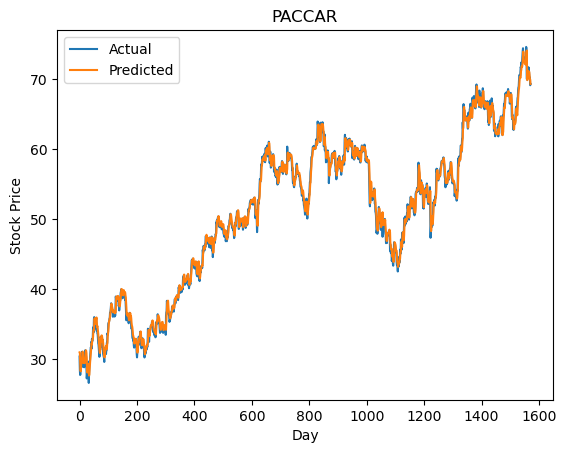

In [17]:
#For pcar.us.txt (PACCAR)
# Load the Apple stock price dataset
data_pcar = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/pcar.us.txt')

# Preprocess the dataset
data_pcar['Date'] = pd.to_datetime(data_pcar['Date'])
data_pcar.set_index('Date', inplace=True)
data_pcar.sort_index(ascending=True, inplace=True)
data_pcar = data_pcar['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_pcar = MinMaxScaler(feature_range=(0, 1))
scaled_data_pcar = scaler_pcar.fit_transform(data_pcar)

# Split the dataset into training and testing sets
train_size_pcar = int(len(scaled_data_pcar) * 0.8)
train_data_pcar, test_data_pcar = scaled_data_pcar[:train_size_pcar], scaled_data_pcar[train_size_pcar:]

# Create sequences for training
def create_sequences(data_pcar, seq_length_pcar):
    X, y = [], []
    for i in range(len(data_pcar) - seq_length_pcar):
        X.append(data_pcar[i : i + seq_length_pcar])
        y.append(data_pcar[i + seq_length_pcar])
    return np.array(X), np.array(y)

sequence_length_pcar = 10
X_train_pcar, y_train_pcar = create_sequences(train_data_pcar, sequence_length_pcar)
X_test_pcar, y_test_pcar = create_sequences(test_data_pcar, sequence_length_pcar)

# Build the LSTM model
model_pcar = Sequential()
model_pcar.add(LSTM(64, input_shape=(sequence_length_pcar, 1)))
model_pcar.add(Dense(1))
model_pcar.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_pcar.fit(X_train_pcar, y_train_pcar, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_pcar = model_pcar.predict(X_test_pcar)

# Inverse scaling for the predicted and actual values
predictions_pcar = scaler_pcar.inverse_transform(predictions_pcar)
y_test_pcar = scaler_pcar.inverse_transform(y_test_pcar)

# Plot the actual and predicted values
plt.plot(y_test_pcar, label='Actual')
plt.plot(predictions_pcar, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('PACCAR')
plt.legend()
plt.show()


In [18]:
# Calculate the metrics
diff_pcar = np.abs(predictions_pcar - y_test_pcar)
max_diff_pcar = np.max(diff_pcar)
min_diff_pcar = np.min(diff_pcar)
mse_pcar = mean_squared_error(y_test_pcar, predictions_pcar)
rmse_pcar = np.sqrt(mse_pcar)
mae_pcar = mean_absolute_error(y_test_pcar, predictions_pcar)

# Print the metrics
print("For Honda")
print("Maximum Difference (Max Diff):", max_diff_pcar)
print("Minimum Difference (Min Diff):", min_diff_pcar)
print("Mean Squared Error (MSE):", mse_pcar)
print("Root Mean Squared Error (RMSE):", rmse_pcar)
print("Average Mean Error (AME):", mae_pcar)

For Honda
Maximum Difference (Max Diff): 4.800364501953126
Minimum Difference (Min Diff): 0.001211120605468352
Mean Squared Error (MSE): 0.675154376475148
Root Mean Squared Error (RMSE): 0.8216777814174775
Average Mean Error (AME): 0.6115583382939777


Epoch 1/10
255/255 [==============================] - 3s 4ms/step - loss: 0.0109
Epoch 2/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 3/10
255/255 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 4/10
255/255 [==============================] - 1s 5ms/step - loss: 9.5673e-04
Epoch 5/10
255/255 [==============================] - 1s 5ms/step - loss: 8.3685e-04
Epoch 6/10
255/255 [==============================] - 1s 5ms/step - loss: 7.7694e-04
Epoch 7/10
255/255 [==============================] - 1s 5ms/step - loss: 7.2461e-04
Epoch 8/10
255/255 [==============================] - 1s 5ms/step - loss: 6.4116e-04
Epoch 9/10
255/255 [==============================] - 1s 5ms/step - loss: 6.1937e-04
Epoch 10/10
20/20 [==============================] - 0s 3ms/step


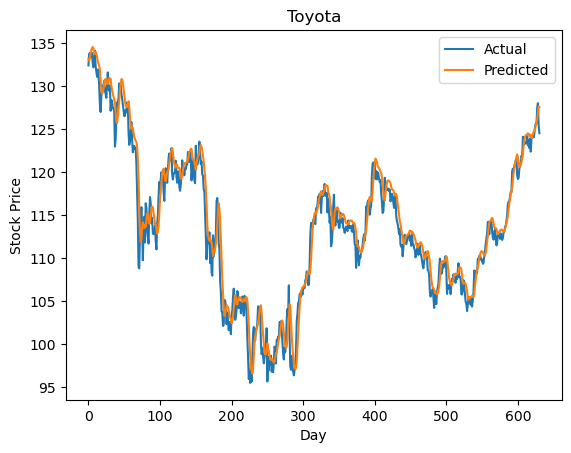

In [19]:
#For tm.us.txt (Toyota)
# Load the Apple stock price dataset
data_tm = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tm.us.txt')

# Preprocess the dataset
data_tm['Date'] = pd.to_datetime(data_tm['Date'])
data_tm.set_index('Date', inplace=True)
data_tm.sort_index(ascending=True, inplace=True)
data_tm = data_tm['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_tm = MinMaxScaler(feature_range=(0, 1))
scaled_data_tm = scaler_tm.fit_transform(data_tm)

# Split the dataset into training and testing sets
train_size_tm = int(len(scaled_data_tm) * 0.8)
train_data_tm, test_data_tm = scaled_data_tm[:train_size_tm], scaled_data_tm[train_size_tm:]

# Create sequences for training
def create_sequences(data_tm, seq_length_tm):
    X, y = [], []
    for i in range(len(data_tm) - seq_length_tm):
        X.append(data_tm[i : i + seq_length_tm])
        y.append(data_tm[i + seq_length_tm])
    return np.array(X), np.array(y)

sequence_length_tm = 10
X_train_tm, y_train_tm = create_sequences(train_data_tm, sequence_length_tm)
X_test_tm, y_test_tm = create_sequences(test_data_tm, sequence_length_tm)

# Build the LSTM model
model_tm = Sequential()
model_tm.add(LSTM(64, input_shape=(sequence_length_tm, 1)))
model_tm.add(Dense(1))
model_tm.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_tm.fit(X_train_tm, y_train_tm, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_tm = model_tm.predict(X_test_tm)

# Inverse scaling for the predicted and actual values
predictions_tm = scaler_tm.inverse_transform(predictions_tm)
y_test_tm = scaler_tm.inverse_transform(y_test_tm)

# Plot the actual and predicted values
plt.plot(y_test_tm, label='Actual')
plt.plot(predictions_tm, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Toyota')
plt.legend()
plt.show()


In [20]:
# Calculate the metrics
diff_tm = np.abs(predictions_tm - y_test_tm)
max_diff_tm = np.max(diff_tm)
min_diff_tm = np.min(diff_tm)
mse_tm = mean_squared_error(y_test_tm, predictions_tm)
rmse_tm = np.sqrt(mse_tm)
mae_tm = mean_absolute_error(y_test_tm, predictions_tm)

# Print the metrics
print("For Honda")
print("Maximum Difference (Max Diff):", max_diff_tm)
print("Minimum Difference (Min Diff):", min_diff_tm)
print("Mean Squared Error (MSE):", mse_tm)
print("Root Mean Squared Error (RMSE):", rmse_tm)
print("Average Mean Error (AME):", mae_tm)

For Honda
Maximum Difference (Max Diff): 10.314323730468743
Minimum Difference (Min Diff): 0.010382385253905113
Mean Squared Error (MSE): 3.8250979190718626
Root Mean Squared Error (RMSE): 1.9557857549005369
Average Mean Error (AME): 1.4460921538968092


Epoch 1/10
148/148 [==============================] - 3s 6ms/step - loss: 0.0060
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 5.4917e-04
Epoch 3/10
148/148 [==============================] - 1s 6ms/step - loss: 5.3317e-04
Epoch 4/10
148/148 [==============================] - 1s 6ms/step - loss: 5.4377e-04
Epoch 5/10
148/148 [==============================] - 1s 6ms/step - loss: 4.9240e-04
Epoch 6/10
148/148 [==============================] - 1s 6ms/step - loss: 4.6985e-04
Epoch 7/10
148/148 [==============================] - 1s 6ms/step - loss: 4.6877e-04
Epoch 8/10
148/148 [==============================] - 1s 6ms/step - loss: 4.6373e-04
Epoch 9/10
148/148 [==============================] - 1s 6ms/step - loss: 3.9235e-04
Epoch 10/10
12/12 [==============================] - 0s 3ms/step


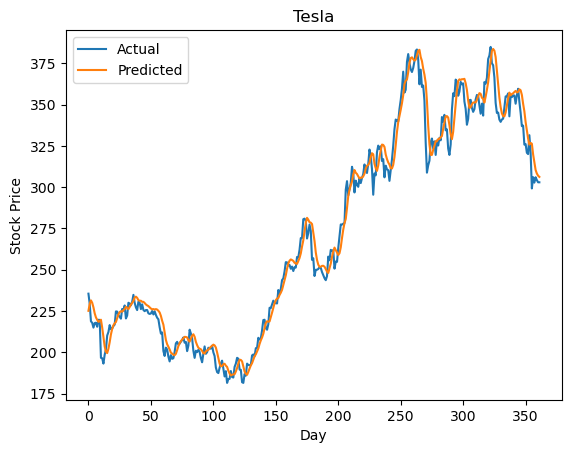

In [21]:
#For tsla.us.txt (Tesla)
# Load the Apple stock price dataset
data_tsla = pd.read_csv('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt')

# Preprocess the dataset
data_tsla['Date'] = pd.to_datetime(data_tsla['Date'])
data_tsla.set_index('Date', inplace=True)
data_tsla.sort_index(ascending=True, inplace=True)
data_tsla = data_tsla['Close'].values.reshape(-1, 1)

#plt.plot(data['Date'], data['Close'])

# Normalize the data
scaler_tsla = MinMaxScaler(feature_range=(0, 1))
scaled_data_tsla = scaler_tsla.fit_transform(data_tsla)

# Split the dataset into training and testing sets
train_size_tsla = int(len(scaled_data_tsla) * 0.8)
train_data_tsla, test_data_tsla = scaled_data_tsla[:train_size_tsla], scaled_data_tsla[train_size_tsla:]

# Create sequences for training
def create_sequences(data_tsla, seq_length_tsla):
    X, y = [], []
    for i in range(len(data_tsla) - seq_length_tsla):
        X.append(data_tsla[i : i + seq_length_tsla])
        y.append(data_tsla[i + seq_length_tsla])
    return np.array(X), np.array(y)

sequence_length_tsla = 10
X_train_tsla, y_train_tsla = create_sequences(train_data_tsla, sequence_length_tsla)
X_test_tsla, y_test_tsla = create_sequences(test_data_tsla, sequence_length_tsla)

# Build the LSTM model
model_tsla = Sequential()
model_tsla.add(LSTM(64, input_shape=(sequence_length_tsla, 1)))
model_tsla.add(Dense(1))
model_tsla.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_tsla.fit(X_train_tsla, y_train_tsla, epochs=10, batch_size=10)

# Make predictions on the test data
predictions_tsla = model_tm.predict(X_test_tsla)

# Inverse scaling for the predicted and actual values
predictions_tsla = scaler_tsla.inverse_transform(predictions_tsla)
y_test_tsla = scaler_tsla.inverse_transform(y_test_tsla)

# Plot the actual and predicted values
plt.plot(y_test_tsla, label='Actual')
plt.plot(predictions_tsla, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Tesla')
plt.legend()
plt.show()


In [22]:
# Calculate the metrics
diff_tsla = np.abs(predictions_tsla - y_test_tsla)
max_diff_tsla = np.max(diff_tsla)
min_diff_tsla = np.min(diff_tsla)
mse_tsla = mean_squared_error(y_test_tsla, predictions_tsla)
rmse_tsla = np.sqrt(mse_tsla)
mae_tsla = mean_absolute_error(y_test_tsla, predictions_tsla)

# Print the metrics
print("For Honda")
print("Maximum Difference (Max Diff):", max_diff_tsla)
print("Minimum Difference (Min Diff):", min_diff_tsla)
print("Mean Squared Error (MSE):", mse_tsla)
print("Root Mean Squared Error (RMSE):", rmse_tsla)
print("Average Mean Error (AME):", mae_tsla)

For Honda
Maximum Difference (Max Diff): 43.41343872070314
Minimum Difference (Min Diff): 0.011883544921886369
Mean Squared Error (MSE): 79.52708356539799
Root Mean Squared Error (RMSE): 8.917795891665047
Average Mean Error (AME): 6.609528585022984


In [27]:
from prettytable import PrettyTable
outputTable = PrettyTable()
outputTable.field_names = ['Name', 'Max Dif', 'Min Dif', 'MSE', 'RMS', 'AME']
outputTable.add_row(['Ford', max_diff_f,  min_diff_f, mse_f, rmse_f, mae_f])
outputTable.add_row(['General Motors', max_diff_gm,  min_diff_gm, mse_gm, rmse_gm, mae_gm])
outputTable.add_row(['Honda', max_diff_hmc,  min_diff_hmc, mse_hmc, rmse_hmc, mae_hmc])
outputTable.add_row(['Navistar', max_diff_nav,  min_diff_nav, mse_nav, rmse_nav, mae_nav])
outputTable.add_row(['PACCAR', max_diff_pcar,  min_diff_pcar, mse_pcar, rmse_pcar, mae_pcar])
outputTable.add_row(['Toyota', max_diff_tm,  min_diff_tm, mse_tm, rmse_tm, mae_tm])
outputTable.add_row(['Tesla', max_diff_tsla,  min_diff_tsla, mse_tsla, rmse_tsla, mae_tsla])
print(outputTable)

+----------------+--------------------+-----------------------+----------------------+---------------------+---------------------+
|      Name      |      Max Dif       |        Min Dif        |         MSE          |         RMS         |         AME         |
+----------------+--------------------+-----------------------+----------------------+---------------------+---------------------+
|      Ford      | 1.8727665939331057 | 6.462097166703984e-06 | 0.041422137466848065 | 0.20352429208044936 | 0.14843440660339982 |
| General Motors | 3.0177223205566435 | 0.0023356933593738916 |  0.6318574759544872  |  0.7948946319824327 |  0.6134286996049491 |
|     Honda      | 2.5134399719238303 | 0.0002780609130859091 | 0.22498189623622336  |  0.4743225655987952 |  0.3407419054663125 |
|    Navistar    | 11.746188812255859 | 0.0006221008300784092 |  1.3446304360719148  |  1.1595820092050044 |  0.8022622282063887 |
|     PACCAR     | 4.800364501953126  |  0.001211120605468352 |  0.675154376475148 